In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Reshape,MaxPooling2D, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

import sys

## Concatenate all datasets

In [2]:
import pandas as pd
import os

folder_path = '/Users/pvuda/Documents/f/combined_file.csv'
combined_df = pd.read_csv(folder_path)

In [3]:
combined_df.head()
print(len(combined_df))

272428


In [4]:
combined_df['real_or_fake_general'] = combined_df['real_or_fake'].apply(lambda x: 'F' if x.startswith('F') else x)
combined_df

,audio_id,real_or_fake,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_var,spectral_centroid_min,spectral_centroid_max,spectral_centroid_range,spectral_centroid_25th_percentile,spectral_centroid_50th_percentile,...,hnr,voicedcount,npause,originaldur,intensity_duration,speakingrate,articulationrate,asd,totalpauseduration,real_or_fake_general
0,p314_157,R,1031.835248,958.150575,9.180525e+05,284.544147,4847.153553,4562.609406,447.791170,647.627898,...,12.494685,7.0,1.0,3.074750,3.074750,2.276608,3.704929,0.269911,1.185375,R
1,p314_157,F04,949.392138,984.265555,9.687787e+05,223.305820,4989.000071,4765.694251,339.174665,537.157786,...,9.537371,8.0,0.0,3.080000,3.080000,2.597403,5.494505,0.182000,1.624000,F
2,p314_157,F03,960.527849,961.003901,9.235285e+05,167.324277,4664.231285,4496.907008,375.869257,549.272699,...,11.395997,7.0,0.0,3.080000,3.080000,2.272727,4.755435,0.210286,1.608000,F
3,p314_157,F06,960.527849,961.003901,9.235285e+05,167.324277,4664.231285,4496.907008,375.869257,549.272699,...,11.395997,7.0,0.0,3.080000,3.080000,2.272727,4.755435,0.210286,1.608000,F
4,p314_157,F02,1045.335653,916.876893,8.406632e+05,283.542545,4307.874245,4024.331700,472.521946,678.304604,...,12.066575,7.0,1.0,3.080000,3.080000,2.272727,4.419192,0.226286,1.496000,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272423,p314_156,F04,1337.380425,1021.819819,1.044116e+06,250.743396,4879.914369,4629.170973,538.439611,1162.905724,...,11.130743,12.0,0.0,3.426667,3.426667,3.501946,5.514706,0.181333,1.250667,F
272424,p314_156,F01,1573.130617,959.458767,9.205611e+05,349.037462,4654.306761,4305.269300,917.060593,1323.939333,...,12.820312,12.0,0.0,2.754125,2.754125,4.357101,5.099737,0.196089,0.401063,F
272425,p314_156,F05,1404.163017,1031.342504,1.063667e+06,330.701295,5011.955662,4681.254367,623.925784,1158.009799,...,12.227384,10.0,0.0,3.418750,3.418750,2.925046,4.595588,0.217600,1.242750,F
272426,p314_156,F02,1409.657239,997.790570,9.955860e+05,377.951428,4507.966454,4130.015025,629.267745,1097.131971,...,13.558063,11.0,0.0,3.420000,3.420000,3.216374,5.055147,0.197818,1.244000,F


## Neural Network

In [5]:
# !pip3 install lime


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import lime
from lime import lime_tabular

df = combined_df.dropna()

label_encoder = LabelEncoder()
df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])

X = df.drop(columns=['audio_id', 'real_or_fake_general', 'real_or_fake'])
y = df['real_or_fake_general']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def create_neural_network():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_neural_network()
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

nn_predictions = nn_model.predict(X_test).flatten()
nn_binary_predictions = (nn_predictions > 0.5).astype(int)
print("Neural Network Accuracy: ", accuracy_score(y_test, nn_binary_predictions))
print(classification_report(y_test, nn_binary_predictions))


/var/folders/7w/mm9ktp7n75dgn8rjth6_zv_m0000gn/T/ipykernel_75415/4267154931.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6793 - loss: -61516976.0000 - val_accuracy: 0.5018 - val_loss: -1076280704.0000
Epoch 2/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6504 - loss: -2450654208.0000 - val_accuracy: 0.7333 - val_loss: -9311588352.0000
Epoch 3/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6496 - loss: -14248853504.0000 - val_accuracy: 0.4975 - val_loss: -34096068608.0000
Epoch 4/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6500 - loss: -46182187008.0000 - val_accuracy: 0.7336 - val_loss: -87690387456.0000
Epoch 5/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6491 - loss: -110212964352.0000 - val_accuracy: 0.4961 - val_loss: -185436585984.0000
Epoch 6/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6475 - loss: -225275658240.0000 - val_accuracy: 0.4957 - val_loss: -344371429376.0000
Epoch 7/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6506 - loss: -4037001

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/var/folders/7w/mm9ktp7n75dgn8rjth6_zv_m0000gn/T/ipykernel_75415/211088984.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


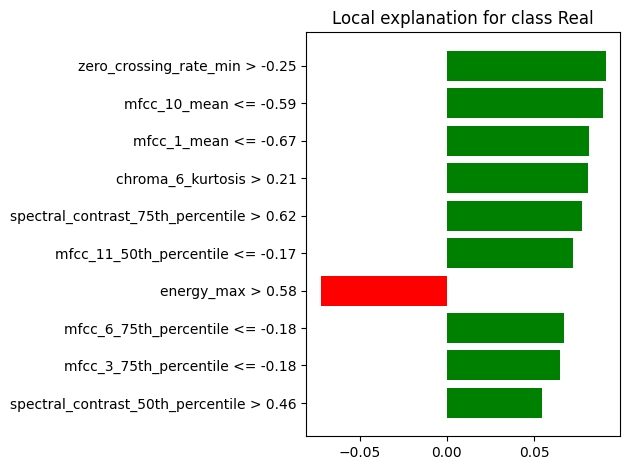

In [7]:

def predict_proba(X):
    predictions = nn_model.predict(X)
    return np.hstack((1-predictions, predictions))


explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns.drop(['audio_id', 'real_or_fake_general', 'real_or_fake']).tolist(),
    class_names=['Fake', 'Real'],
    mode='classification'
)

i = 10  
exp = explainer.explain_instance(X_test[i], predict_proba, num_features=10)


fig = exp.as_pyplot_figure()
fig.tight_layout()
fig.show()

## Convolutionary Neural Network

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt


df = combined_df.dropna()

label_encoder = LabelEncoder()
df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])

X = df.drop(columns=['audio_id', 'real_or_fake_general', 'real_or_fake'])
y = df['real_or_fake_general']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled for CNN input (batch, steps, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
nn_model = create_cnn_model((X_train.shape[1], 1))
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


nn_predictions = nn_model.predict(X_test).flatten()
nn_binary_predictions = (nn_predictions > 0.5).astype(int)
print("CNN Model Accuracy: ", accuracy_score(y_test, nn_binary_predictions))
print(classification_report(y_test, nn_binary_predictions))

def predict_proba(X):
 
    X = X.reshape(X.shape[0], X.shape[1], 1)
    predictions = nn_model.predict(X)
    return np.hstack((1-predictions, predictions))

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.reshape(X_train.shape[0], X_train.shape[1]),
    feature_names=df.columns.drop(['audio_id', 'real_or_fake_general', 'real_or_fake']).tolist(),
    class_names=['Fake', 'Real'],
    mode='classification'
)

i = 10 
exp = explainer.explain_instance(X_test[i].flatten(), predict_proba, num_features=10)

fig = exp.as_pyplot_figure()
fig.tight_layout()
plt.show()


/var/folders/7w/mm9ktp7n75dgn8rjth6_zv_m0000gn/T/ipykernel_75415/867035807.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5233/5233 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - accuracy: 0.4767 - loss: -434591360.0000 - val_accuracy: 0.4806 - val_loss: -7913968128.0000
Epoch 2/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 70s 13ms/step - accuracy: 0.4858 - loss: -18097946624.0000 - val_accuracy: 0.4832 - val_loss: -71028391936.0000
Epoch 3/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.4883 - loss: -107546984448.0000 - val_accuracy: 0.4877 - val_loss: -256683704320.0000
Epoch 4/10
5059/5233 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4879 - loss: -339895320576.0000